# 概览

| Package (包)          | Description (描述)                                                                 |
|-----------------------|-----------------------------------------------------------------------------------|
| torch                 | 张量计算组件，兼容 NumPy 数组，且具备强大的 GPU 加速支持                             |
| torch.autograd        | 自动微分组件，是 PyTorch 的核心特点，支持 torch 中所有可微分的张量操作               |
| torch.nn              | 深度神经网络组件，用于灵活构建不同架构的深度神经网络                                 |
| torch.optim           | 优化计算组件，囊括了 SGD、RMSProp、LBFGS、Adam 等常用的参数优化方法                   |
| torch.multiprocessing | 多进程管理组件，方便实现相同数据的不同进程中共享视图                                   |
| torch.utils           | 工具函数组件，包含数据加载、训练等常用函数                                           |
| torch.legacy(.nn/.optim) | 向后兼容组件，包含移植的旧代码                                                     |

# 张量类型和定义

| 数据类型 dtype          | CPU 张量               | GPU 张量                     |
|------------------------|-----------------------|-----------------------------|
| 32-bit 浮点            | torch.FloatTensor     | torch.cuda.FloatTensor      |
| 64-bit 浮点            | torch.DoubleTensor    | torch.cuda.DoubleTensor     |
| 16-bit 半精度浮点      | N/A                   | torch.cuda.HalfTensor       |
| 8-bit 无符号整形 (0~255) | torch.ByteTensor      | torch.cuda.ByteTensor       |
| 8-bit 有符号整形 (-128~127) | torch.CharTensor    | torch.cuda.CharTensor       |
| 16-bit 有符号整形      | torch.ShortTensor     | torch.cuda.ShortTensor      |
| 32-bit 有符号整形      | torch.IntTensor       | torch.cuda.IntTensor        |
| 64-bit 有符号整形      | torch.LongTensor      | torch.cuda.LongTensor       |

其中，默认的 torch.Tensor 类型为 32-bit 浮点，也就是 torch.FloatTensor。

In [1]:
import torch as t
t.Tensor().dtype

torch.float32

In [2]:
t.set_default_tensor_type('torch.DoubleTensor')
t.Tensor().dtype

torch.float64

In [3]:
t.set_default_tensor_type('torch.FloatTensor')
t.Tensor().dtype

torch.float32

In [4]:
# 传列表创建张量
t.Tensor([1,2,3])

tensor([1., 2., 3.])

In [5]:
# 通过numpy来
import numpy as np
t.Tensor(np.random.randn(3))

tensor([-0.2650, -0.2116, -1.0728])

In [7]:
# 与 Numpy 一致，可以通过 shape 查看 Tensor 的形状：
t.Tensor([[1, 2], [3, 4], [5, 6]]).shape

torch.Size([3, 2])

| 方法                     | 描述                                      |
|--------------------------|-------------------------------------------|
| ones(*sizes)             | 创建全为 1 的 Tensor                       |
| zeros(*sizes)            | 创建全为 0 的 Tensor                       |
| eye(*sizes)              | 创建对角线为 1，其他为 0 的 Tensor           |
| arange(s, e, step)       | 创建从 s 到 e，步长为 step 的 Tensor         |
| linspace(s, e, steps)    | 创建从 s 到 e，均匀切分成 steps 份的 Tensor  |
| rand/randn(*sizes)       | 创建均匀/标准分布的 Tensor                  |
| normal(mean, std)        | 创建正态分布分布的 Tensor                   |
| randperm(m)              | 创建随机排列的 Tensor                       |

# 数学运算


In [10]:
a = t.Tensor([[1, 2], [3, 4]])
b = t.Tensor([[5, 6], [7, 8]])
# 形状要一样的
print(a + b)
print(a - b)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])


| 方法                     | 描述                  |
|--------------------------|-----------------------|
| mean / sum / median / mode | 均值 / 和 / 中位数 / 众数 |
| norm / dist              | 范数 / 距离            |
| std / var                | 标准差 / 方差          |
| cumsum / cumprod         | 累加 / 累乘            |

| 方法                     | 描述                                      |
|--------------------------|-------------------------------------------|
| abs / sqrt / div / exp / fmod / log / pow | 绝对值 / 平方根 / 除法 / 指数 / 求余 / 自然对数 / 求幂 |
| cos / sin / asin / atan2 / cosh | 余弦 / 正弦 / 反正弦 / 反正切 / 双曲余弦 |
| ceil / round / floor / trunc | 上取整 / 四舍五入 / 下取整 / 只保留整数部分 |
| clamp(input, min, max)   | 超过 min 和 max 部分截断                   |
| sigmoid / tanh           | 常用激活函数                               |

# 线性代数

| 方法       | 描述                  |
|------------|-----------------------|
| trace      | 对角线元素之和         |
| diag       | 对角线元素             |
| triu / tril| 上三角 / 下三角矩阵     |
| matmul         | 矩阵乘法               |
| t          | 转置                   |
| inverse    | 求逆矩阵               |
| svd        | 奇异值分解             |

对应，reshape()，resize() 和 view()，三者直接的区别在于：resize() 和 view() 执行变换时和原 Tensor 共享内存，即修改一个，另外一个也会跟着改变。而 reshape() 则会复制到新的内存区块上。

# 自动微分

我们通过传入一个 Tensor 去构造 Variable，同时可以指定 2 个参数：

- requires_grad (bool)：决定是否对 Variable 微分，如果 requires_grad=True，计算过程将被追踪，此变量的梯度将累积到 .grad 属性中。
- volatile (bool)：直译为「挥发」，如果 volatile=True，则构建在该 Variable 之上的图都不会微分，此参数为模型推理阶段设计。

In [12]:
from torch.autograd import Variable

x = Variable(t.ones(3, 4), requires_grad=True)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

In [13]:
x = t.ones(3, 4, requires_grad=True)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

In [14]:
print(x.data)
print(x.grad)
print(x.grad_fn)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
None
None


因为这里没有计算过程，所以 grad 和 grad_fn 都是 None。我们可以对 x 执行一次运算：

In [22]:
%matplotlib inline
y = x*x + 2
print(y)
y.grad_fn


tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]], grad_fn=<AddBackward0>)


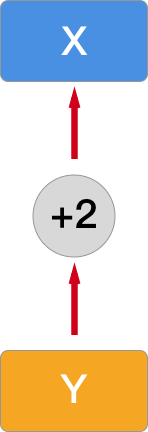

In [23]:
# 复杂点
z = t.mean(y.pow(3))
print(z)
z.grad_fn

tensor(27., grad_fn=<MeanBackward0>)


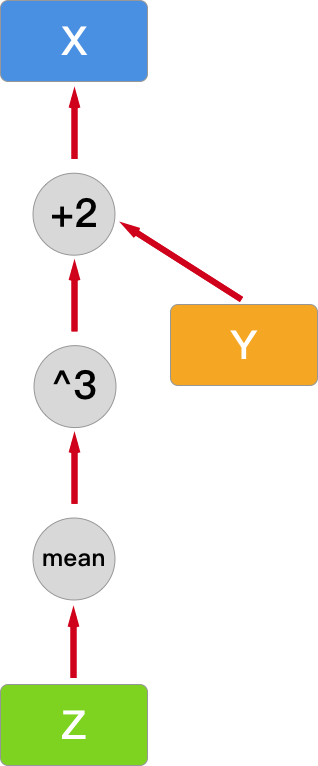

此时，你可以使用 backward 进行反向传播，并计算所有叶子节点的导数（梯度）。注意，Z 和 Y 都不是叶子节点，所以都没有梯度信息。



In [24]:
z.backward()
print(z.is_leaf, y.is_leaf, x.is_leaf)
print(z.grad)
print(y.grad)
print(x.grad)

False False True
None
None
tensor([[4.5000, 4.5000, 4.5000, 4.5000],
        [4.5000, 4.5000, 4.5000, 4.5000],
        [4.5000, 4.5000, 4.5000, 4.5000]])


C:\Users\change longer\AppData\Local\Temp\ipykernel_26808\15812736.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:491.)
  print(z.grad)
C:\Users\change longer\AppData\Local\Temp\ipykernel_26808\15812736.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tens

注意，由于梯度是会累计的，所以重复运行计算 Z 的代码就相当于修改了计算图，相应的梯度值也会发生变化。除此之外，如果你重复运行 backward() 会报错，原因是前向传递过程之后将所需数值保存为 buffer，当计算完梯度之后会自动清空。如果想要多次反向传播，那就需要通过 backward(retain_graph=True) 参数来保证 buffer 的持久性。

下面，我们再通过一个例子对比 Autograd 的自动求导和手动求导数的过程。首先，创建一个随机 Tensor，并开启 requires_grad=True：



In [26]:
x = t.randn(3,4,requires_grad=True)
x

tensor([[-0.2719,  0.2375,  1.1766,  0.0424],
        [ 0.7384, -0.1945, -0.9695,  1.3192],
        [-0.8805, -0.9884, -0.2491, -0.3691]], requires_grad=True)

In [27]:
y = t.sigmoid(x)
y

tensor([[0.4324, 0.5591, 0.7643, 0.5106],
        [0.6766, 0.4515, 0.2750, 0.7890],
        [0.2931, 0.2712, 0.4380, 0.4087]], grad_fn=<SigmoidBackward0>)

然后，我们可以通过 Autograd 机制得到导数计算结果。这里需要使用到 backward，并传入一个形状与 y 一致的 gradient：



In [28]:
y.backward(gradient=t.ones(y.size()))
x.grad

tensor([[0.2454, 0.2465, 0.1801, 0.2499],
        [0.2188, 0.2477, 0.1994, 0.1665],
        [0.2072, 0.1977, 0.2462, 0.2417]])